# Build Model #2

This approach to building a model will look deeper at each variable before incorporating it into a model and make new attempts at more accurate feature engineering. The priority for this model is to mitigate RMSE and fulfill the assumptions of linearity.

In [1]:
# Import libraries and dataframe:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score
import folium
from folium.plugins import HeatMap

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

df = pd.read_csv('../CSVs/zip_inclusion.csv')

In [2]:
df_sorted = df.copy()
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21953 entries, 0 to 21952
Data columns (total 35 columns):
Unnamed: 0          21953 non-null int64
id                  21953 non-null int64
date                21953 non-null object
price               21953 non-null float64
bedrooms            21953 non-null int64
bathrooms           21953 non-null float64
view                21953 non-null int64
condition           21953 non-null int64
grade               21953 non-null int64
yr_built            21953 non-null int64
zipcode             21953 non-null int64
lat                 21953 non-null float64
long                21953 non-null float64
month               21953 non-null int64
year                21953 non-null int64
age                 21953 non-null int64
reno_age            21953 non-null int64
multiple_stories    21953 non-null float64
on_water            21953 non-null int64
renovated           21953 non-null int64
has_basement        21953 non-null int64
log_sqft_living    

In [3]:
# Define the variables we don't want included in future models:
drops = ['id','price','log_price','date', 'day_of_year', 'lat','long','zipcode']

## This approach will incorporate a logarithmically transformed target variable (price)

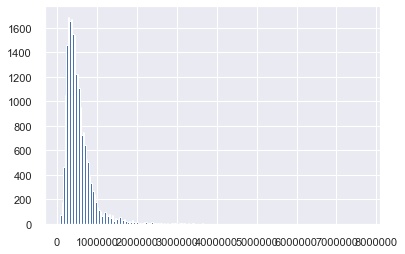

In [4]:
df_sorted['price'].hist(bins=200)

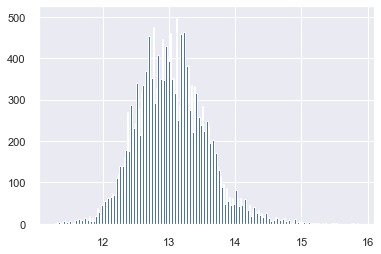

In [5]:
# Logarithmically transform the price variable but keep the original 'price' factor for testing results later.
log_price = np.log(df_sorted['price'])
df_sorted['log_price'] = log_price
df_sorted['log_price'].hist(bins=200)

In [6]:
outcome = 'log_price'
x_cols = df_sorted.drop(drops, axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df_sorted).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.703    
Dependent Variable:   log_price        AIC:                7729.9734
Date:                 2020-07-26 14:33 BIC:                7937.8866
No. Observations:     21953            Log-Likelihood:     -3839.0  
Df Model:             25               F-statistic:        2077.    
Df Residuals:         21927            Prob (F-statistic): 0.00     
R-squared:            0.703            Scale:              0.083164 
--------------------------------------------------------------------
                  Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
Intercept        -64.4135   8.5670  -7.5188 0.0000 -81.2054 -47.6217
spring[T.True]     0.0474   0.0056   8.4942 0.0000   0.0364   0.0583
summer[T.True]     0.0385   0.0058   6.6143 0.0000   0.0271   0.0499
bedrooms          -0.0349   0.0028 -12.5130 0.0000  -0.0404  -0.0294
bathrooms          0.0781   0.0044  17.5621 0.0000   0.0694   0.0869
view               0.0580   0.0030  19.5470 0.0000   0.0522   0.0638
condition          0.0335   0.0033  10.1907 0.0000   0.0271   0.0400
grade              0.2015   0.0028  71.6216 0.0000   0.1960   0.2070
yr_built           0.0214   0.0028   7.5495 0.0000   0.0158   0.0270
month              0.0069   0.0012   5.7307 0.0000   0.0045   0.0093
year               0.0466   0.0057   8.2182 0.0000   0.0355   0.0577
age                0.0252   0.0028   8.8846 0.0000   0.0196   0.0307
reno_age          -0.0034   0.0006  -5.4984 0.0000  -0.0046  -0.0022
multiple_stories -64.4135   8.5670  -7.5188 0.0000 -81.2054 -47.6217
on_water           0.3956   0.0249  15.9052 0.0000   0.3468   0.4443
renovated          0.0768   0.0155   4.9690 0.0000   0.0465   0.1071
has_basement       0.0095   0.0044   2.1559 0.0311   0.0009   0.0182
log_sqft_living    0.3884   0.0095  40.7265 0.0000   0.3697   0.4071
zip_98039          0.7929   0.0403  19.6919 0.0000   0.7140   0.8718
zip_98004          0.6540   0.0164  39.8764 0.0000   0.6218   0.6861
zip_98112          0.4382   0.0181  24.2720 0.0000   0.4028   0.4736
zip_98040          0.3899   0.0176  22.1691 0.0000   0.3554   0.4244
zip_98102          0.3588   0.0286  12.5545 0.0000   0.3028   0.4149
zip_98199          0.3095   0.0165  18.7660 0.0000   0.2772   0.3419
zip_98109          0.3887   0.0279  13.9337 0.0000   0.3340   0.4434
zip_98105          0.3803   0.0194  19.5673 0.0000   0.3422   0.4184
zip_98119          0.3770   0.0216  17.4494 0.0000   0.3347   0.4194
zip_98115          0.3069   0.0122  25.2393 0.0000   0.2831   0.3308
--------------------------------------------------------------------
Omnibus:           172.395    Durbin-Watson:       1.961            
Prob(Omnibus):     0.000      Jarque-Bera (JB):    179.516          
Skew:              -0.203     Prob(JB):            0.000            
Kurtosis:          3.178      Condition No.:       10008253704557784
====================================================================
* The condition number is large (1e+16). This might indicate
strong multicollinearity or other numerical problems.
"""

Okay, there is a new baseline model with a small bump in adjusted r2

## Feature Engineering

The transformation of the target variable seemed to do a little to the underlying model but lets see if we can incorporate add an increased weight on location beyond our chosen zip codes. I'm not too familiar with the Seattle area so let's map our sales with Folium: 

In [7]:
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.6):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

In [8]:
# Divide the county into quadrants
df_sorted.loc[(df_sorted['lat'] > 47.5 ) & (df_sorted['long'] > -122.2), "sector_1"] = 1
df_sorted['quadrant_1'] = df_sorted['sector_1'].fillna(0)
df_sorted['quadrant_1'] = df_sorted['quadrant_1'].astype('category')
df_sorted.loc[(df_sorted['lat'] > 47.5 ) & (df_sorted['long'] < -122.2), "sector_2"] = 2
df_sorted['quadrant_2'] = df_sorted['sector_2'].fillna(0)
df_sorted['quadrant_2'] = df_sorted['quadrant_2'].astype('category')
df_sorted.loc[(df_sorted['lat'] < 47.5 ) & (df_sorted['long'] > -122.2), "sector_3"] = 3
df_sorted['quadrant_3'] = df_sorted['sector_3'].fillna(0)
df_sorted['quadrant_3'] = df_sorted['quadrant_3'].astype('category')
df_sorted.loc[(df_sorted['lat'] < 47.5 ) & (df_sorted['long'] < -122.2), "sector_4"] = 4
df_sorted['quadrant_4'] = df_sorted['sector_4'].fillna(0)
df_sorted['quadrant_4'] = df_sorted['quadrant_4'].astype('category')
df_sorted = df_sorted.drop(['sector_1','sector_2','sector_3','sector_4'], axis=1)

In [9]:
df_sorted.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,view,condition,grade,yr_built,...,zip_98199,zip_98109,zip_98105,zip_98119,zip_98115,log_price,quadrant_1,quadrant_2,quadrant_3,quadrant_4
0,0,7129300520,2014-10-13,221900.0,3,1.00,0,3,7,1955,...,0,0,0,0,0,12.309982,0.0,2.0,0.0,0.0
1,1,6414100192,2014-12-09,538000.0,3,2.25,0,3,7,1951,...,0,0,0,0,0,13.195614,0.0,2.0,0.0,0.0
2,2,5631500400,2015-02-25,180000.0,2,1.00,0,3,6,1933,...,0,0,0,0,0,12.100712,0.0,2.0,0.0,0.0
3,3,2487200875,2014-12-09,604000.0,4,3.00,0,5,7,1965,...,0,0,0,0,0,13.311329,0.0,2.0,0.0,0.0
4,4,1954400510,2015-02-18,510000.0,3,2.00,0,3,8,1987,...,0,0,0,0,0,13.142166,1.0,0.0,0.0,0.0


In [11]:
outcome = 'log_price'
x_cols = df_sorted.drop(drops, axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df_sorted).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS              Adj. R-squared:     0.823     
Dependent Variable:   log_price        AIC:                -3668.0365
Date:                 2020-07-26 14:34 BIC:                -3428.1367
No. Observations:     21953            Log-Likelihood:     1864.0    
Df Model:             29               F-statistic:        3525.     
Df Residuals:         21923            Prob (F-statistic): 0.00      
R-squared:            0.823            Scale:              0.049473  
---------------------------------------------------------------------
                   Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
Intercept         -76.6352   6.6095 -11.5948 0.0000 -89.5902 -63.6802
spring[T.True]      0.0360   0.0043   8.3703 0.0000   0.0276   0.0444
summer[T.True]      0.0325   0.0045   7.2482 0.0000   0.0237   0.0413
quadrant_1[T.1.0]   0.1399   0.0283   4.9404 0.0000   0.0844   0.1954
quadrant_2[T.2.0]   0.1231   0.0283   4.3497 0.0000   0.0676   0.1786
quadrant_3[T.3.0]  -0.2413   0.0284  -8.4850 0.0000  -0.2971  -0.1856
quadrant_4[T.4.0]  -0.3490   0.0285 -12.2579 0.0000  -0.4048  -0.2932
bedrooms           -0.0244   0.0022 -11.3431 0.0000  -0.0287  -0.0202
bathrooms           0.0492   0.0035  14.2218 0.0000   0.0424   0.0559
view                0.0674   0.0023  29.3199 0.0000   0.0629   0.0719
condition           0.0534   0.0026  20.7949 0.0000   0.0484   0.0584
grade               0.1442   0.0022  64.7542 0.0000   0.1398   0.1485
yr_built            0.0260   0.0022  11.8859 0.0000   0.0217   0.0303
month               0.0065   0.0009   7.0476 0.0000   0.0047   0.0084
year                0.0541   0.0044  12.3704 0.0000   0.0455   0.0627
age                 0.0281   0.0022  12.8511 0.0000   0.0238   0.0324
reno_age           -0.0037   0.0005  -7.8408 0.0000  -0.0046  -0.0028
multiple_stories  -76.6352   6.6095 -11.5948 0.0000 -89.5902 -63.6802
on_water            0.4734   0.0192  24.6449 0.0000   0.4358   0.5111
renovated           0.1158   0.0119   9.6996 0.0000   0.0924   0.1392
has_basement       -0.0347   0.0035  -9.9129 0.0000  -0.0416  -0.0279
log_sqft_living     0.4618   0.0075  61.1867 0.0000   0.4470   0.4766
zip_98039           0.7369   0.0312  23.6460 0.0000   0.6758   0.7980
zip_98004           0.5621   0.0128  44.0817 0.0000   0.5371   0.5871
zip_98112           0.3984   0.0140  28.4166 0.0000   0.3709   0.4259
zip_98040           0.3021   0.0138  21.8959 0.0000   0.2750   0.3291
zip_98102           0.3157   0.0221  14.2858 0.0000   0.2724   0.3590
zip_98199           0.2359   0.0128  18.3903 0.0000   0.2107   0.2610
zip_98109           0.3335   0.0216  15.4667 0.0000   0.2912   0.3758
zip_98105           0.3135   0.0151  20.8145 0.0000   0.2840   0.3430
zip_98119           0.3211   0.0167  19.2043 0.0000   0.2884   0.3539
zip_98115           0.2071   0.0095  21.7506 0.0000   0.1885   0.2258
---------------------------------------------------------------------
Omnibus:          762.527    Durbin-Watson:       2.007              
Prob(Omnibus):    0.000      Jarque-Bera (JB):    2185.907           
Skew:             -0.059     Prob(JB):            0.000              
Kurtosis:         4.541      Condition No.:       4036866986824820736
=====================================================================
* The condition number is large (4e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

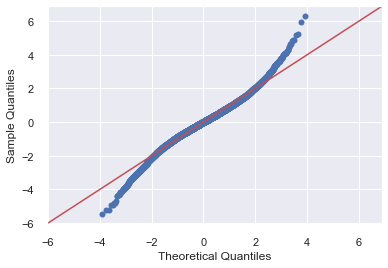

In [12]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Much better! Let's split and test the data now.

In [13]:
outcome = 'log_price'
x_cols = list(df_sorted.columns)
x_cols.remove(outcome)
train, test = train_test_split(df_sorted, test_size = .2)

In [14]:
y_train = train['log_price']
X_train = train.drop(drops, axis = 1)
y_test = test['log_price']
X_test = test.drop(drops, axis = 1)

In [15]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.048907860823046566
Test Mean Squarred Error: 0.05132421217749269


In [16]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 0.22115121709601004
Test Root Mean Squarred Error: 0.22654847644045786


Okay so we can see that these results tell us that test and training data produces similar results but the units make it difficult to interpret. Now we'll use our model to predict outcomes then transform those outcomes back to price in dollars and interpret the model then. For more information on what these numbers mean and why we are taking these next steps, see the associated blog post with this project.

In [17]:
#We'll first build a function to test regression results:
def regression_results(y_true, y_pred, terms):
    def adjustedR2(r2,n,k):
        return r2-(k-1)/(n-k)*(1-r2)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    adjr2 = adjustedR2(r2, len(terms), len(terms.columns))
  
    print('r2: ', round(r2,4))
    print('Adjusted r2: ', round(adjr2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

### Train Data

In [18]:
train_predictions = linreg.predict(X_train)
train['predictions'] = np.expm1(train_predictions)
y_true = train['price']
y_pred = np.expm1(train_predictions)
regression_results(y_true, y_pred, X_train)

r2:  0.8443
Adjusted r2:  0.8441
MAE:  88285.2305
MSE:  19903800224.3428
RMSE:  141080.8287


### Test Data

In [19]:
predictions = linreg.predict(X_test)
test['predictions'] = np.expm1(predictions)
y_true = test['price']
y_pred = np.expm1(predictions)
regression_results(y_true, y_pred, X_test)

r2:  0.87
Adjusted r2:  0.8691
MAE:  89809.0037
MSE:  20760039981.1764
RMSE:  144083.448


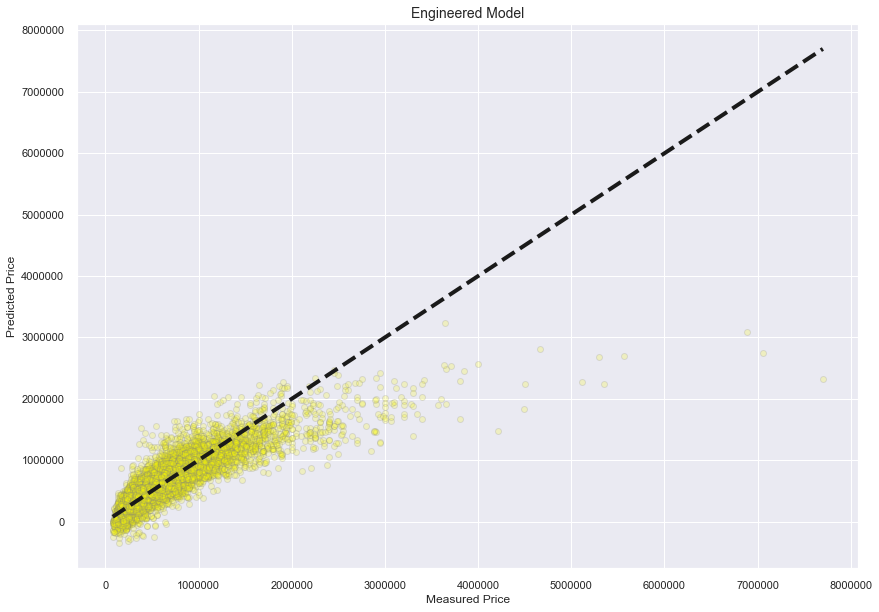

In [20]:
y = df_sorted['price']
X = df_sorted.drop(drops, axis = 1)
predicted = cross_val_predict(linreg, X, y, cv=10)

plt.figure(figsize = (14,10))
plt.scatter(y, predicted, alpha=0.2, color='yellow', edgecolors='gray')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured Price', size=12)
plt.ylabel('Predicted Price', size=12)
plt.title("Engineered Model", size=14)
plt.show();

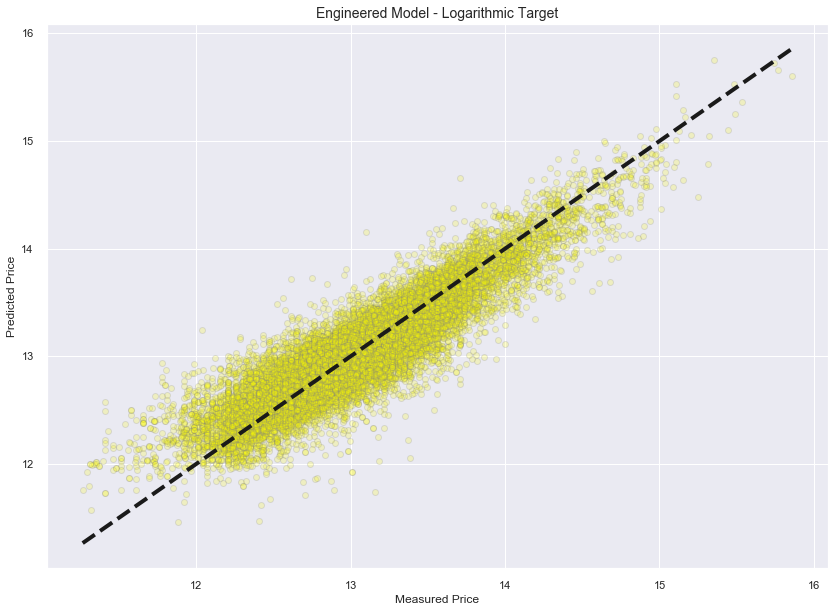

In [21]:
y = df_sorted['log_price']
X = df_sorted.drop(drops, axis = 1)
predicted = cross_val_predict(linreg, X, y, cv=10)

plt.figure(figsize = (14,10))
plt.scatter(y, predicted, alpha=0.2, color='yellow', edgecolors='gray')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured Price', size=12)
plt.ylabel('Predicted Price', size=12)
plt.title("Engineered Model - Logarithmic Target", size=14)
plt.show();

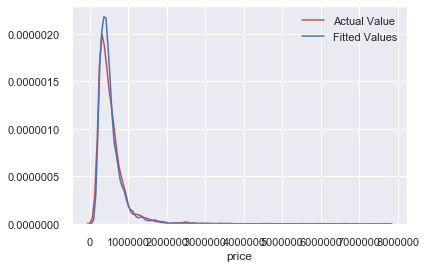

In [22]:
ax1 = sns.distplot(y_true, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1);

Overall this is the best result we've managed to yield so far! In the next attempt we'll try to apply some polynomial factors.

In [23]:
df_sorted.to_csv('../CSVs/kc_sorted.csv')